TU Delft internship of Bordeaux ENSEIRB -MATMECA student Anouchka Desmettre 
Dates: June 1st - August 31st, 2024 

Supervision: D. Lahaye (DIAM - EEMCS Faculty - TU Delft)

# Title: Mathematical modelling and numerical simulation of driving buses and vibrations door   

## 1. Introduction

The sustainable growth of cities increasingly relies on public transportation, prompting major bus manufacturers such as Volvo, VDL, and Scania to explore innovative vehicle models and systems. Among these systems, bus door mechanisms play a crucial role, requiring continual refinement and optimization. 

In this context, numerical modeling emerges as a pivotal tool to support and enhance the design and construction of bus doors. This approach allows for detailed analysis and simulation of various door configurations, materials, and operational scenarios, facilitating informed decision-making throughout the development process.

Our collaboration with Ventura, a renowned leader in bus door manufacturing, provides valuable insights into the industry's demands and challenges. Ventura's commitment to cutting-edge technology and rigorous safety standards underscores the importance of advanced modeling techniques in addressing complex engineering requirements.

### 1.1 Test Scenarios

We study the effect of an object falling on an elastic structure. For example, consider a sandbag test where a sandbag falls onto a door system, including both the door leaves and the door support mechanism. This simulates the impact forces and allows us to analyze how the structure responds to sudden loads.

We analyze the effect of continuous or repeated forces on an elastic structure. For instance, examining a door system mounted on a shaker table or a bus driving over a test track. This helps us understand how the structure behaves under sustained or oscillatory forces.
What We've Been Doing:

By solving the differential equations of a mass-spring-damper system numerically and comparing them with analytical solutions, we are able to study the dynamic behavior of such systems under various conditions, including impacts and forced vibrations. This approach helps us understand how real-world systems like door mechanisms respond to different kinds of external forces.

## 2. Definitions of Terms 

**Plug Sliding Door**:
   - *Definition*: A type of sliding door mechanism commonly used in transportation vehicles such as buses and trains. The plug sliding door system typically consists of two door leaves that slide horizontally along a track, allowing for efficient ingress and egress of passengers. The term "plug" refers to the door leaf's ability to tightly seal against the door frame when closed, providing enhanced safety and protection against external elements.

**Bus Door Leaf**:
   - *Definition*: The individual panel or leaf that constitutes a bus door. Bus door leaves are typically constructed from lightweight yet durable materials such as aluminum or composite alloys. They serve as the primary barrier between the interior and exterior of the bus, facilitating passenger entry and exit while providing structural integrity and security.

**Bus Door Suspension Mechanism**:
   - *Definition*: The mechanical system responsible for supporting and facilitating the movement of bus door leaves. The suspension mechanism typically consists of a network of hinges, rollers, and guides that enable smooth operation of the doors while ensuring proper alignment and stability. This system may include pneumatic, hydraulic, or electromechanical components to assist in opening and closing the doors.

**Upper Door Arm**:
   - *Definition*: A structural component of the bus door suspension mechanism located at the top of the door frame. The upper door arm serves as a pivotal attachment point for the door leaf, allowing it to pivot outward or inward during the opening and closing process. It provides stability and support while guiding the movement of the door leaf along its designated trajectory.

**Bottom Door Support**:
   - *Definition*: The lowermost element of the bus door suspension mechanism, situated at the base of the door frame. The bottom door support serves as a foundation for the door leaf, preventing excessive movement or misalignment during operation. It may consist of rollers, tracks, or other guiding elements designed to ensure smooth and controlled movement of the door leaf along its intended path.


## 3. Single Point Mass System 


### 3.1 Case-study/Description/Motion

This section aims to create models using mass-spring-damper systems to simulate the vibrations of bus doors while the bus is in motion. We'll consider the entire single door (door leaf and door frame) as a single point mass with negligible physical dimensions.
The spring represents the elastic forces that tend to return the door to its equilibrium position after a disturbance. The stiffer the spring, the higher the spring constant $k$. The damper represents the frictional or resistive forces that dissipate the energy of the oscillations. Higher damping coefficient $γ$ means the oscillations are attenuated more quickly.


### 3.2 Mathematical Model 

#### ODE for Mass-Spring-Damper System

Consider a mass-spring-damper system with the following equation of motion:
$ 
m \ddot{u}(t) + \gamma \dot{u}(t) + k u(t) = F_{external}(t)
$

where:
- $ m $ is the mass
- $ \gamma $ is the damping coefficient
- $ k $ is the spring constant
- $ u(t) $is the displacement as a function of time
- $ \dot{u}(t)$ is the velocity
- $ \ddot{u}(t)$ is the acceleration
- $ F_{external}(t)$ is the external force applied to the system
  
#### Initial Conditions

The system starts from rest, so the initial conditions are:

$
u(0) = 0 \quad \text{(zero initial position)}
$

$
\dot{u}(0) = 0 \quad \text{(zero initial velocity)}
$

### 3.3 Parameter values 

1. **Mass $m$:**
   Between 50 and 100 kg.

3. **Spring Constant $k$:**
   Such that $\sqrt{\frac{k}{m}}$ matches the measured resonant frequency $\omega_0$, meaning that : $ k = m\omega_0^2$ (simple harmonic motion) 

4. **Damping Coefficient $\gamma$:**
   Hard to estimate directly. Resort to experimental measurements or tuning based on observations.


### 3.4 Impact study 

#### Test Case Description 

In this test case, we will study the response of a mass-spring-damper system subjected to an impulsive force. The system is one-dimensional, with motion along the x-axis.

#### Frequency Analysis
- As said before, the external force can be either a Dirac delta function or a Gaussian pulse.
- To analyze the frequency content of the excitation, we will perform a Fast Fourier Transform (FFT) on the Gaussian pulse to verify if it contains a contribution at the system's resonant frequency.

#### Analytical Solution

Here we used two different approaches to find the solution of the equation. Both methods work very well; however, in my opinion, the Laplace Transform requires fewer calculations.

##### Analytical Solution Solving the 2nd Order Equation for a Gaussian Pulse 

1. **Homogeneous Solution:**

   First, we solve the homogeneous equation (without the external force):
   $ m \ddot{u}(t) + \gamma \dot{u}(t) + k u(t) = 0 $

   This is a standard second-order linear differential equation with constant coefficients. The characteristic equation is: $ m r^2 + \gamma r + k = 0 $

   Solving for $ r $:
   $ r = \frac{-\gamma \pm \sqrt{\Delta}}{2m} $

   The nature of the solution $ r $ depends on the discriminant $ \Delta = \gamma^2 - 4mk $:

   - **Overdamped** ($ \Delta > 0 $): Two distinct real roots.
   - **Critically damped** ($ \Delta = 0 $): One real root (repeated).
   - **Underdamped** ($ \Delta < 0 $): Two complex conjugate roots.
     
In the case of bus doors, a slightly underdamped system allows for quick and efficient opening and closing, ensuring passenger safety and comfort. This design strikes a balance between speed and stability, minimizing oscillations and reducing wear on mechanical components, thereby enhancing the overall durability and performance of the door mechanism. So : 
   $ r = \alpha \pm i\beta $
   where $ \alpha = -\frac{\gamma}{2m} $ and $ \beta = \frac{\sqrt{4mk - \gamma^2}}{2m} $.

   The general solution to the homogeneous equation is: $ u_h(t) = e^{\alpha t} (C_1 \cos(\beta t) + C_2 \sin(\beta t)) $


2. **Particular Solution - Gaussian Pulse:**

To find the particular solution $u_p(t)$, we need to consider the form of $F_{\text{external}}(t)$. For a Gaussian pulse : $F(t) = \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}}$, we assume a particular solution of the form:

$
u_p(t) = A(t) e^{-\frac{(t - t_0)^2}{2\sigma^2}}
$

To find $A(t)$, we substitute $u_p(t)$ into the non-homogeneous differential equation:

$
m \left( \frac{d^2}{dt^2} \left( \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}} \right) \right) + \gamma \left( \frac{d}{dt} \left( \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}} \right) \right) + k \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}} = F_0 e^{-\frac{(t - t_0)^2}{2\sigma^2}}
$

By differentiating and simplifying, we solve for $A(t)$.

Calculate the first and second derivatives : 

$
\frac{d}{dt} \left( \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}} \right) = \frac{F_0}{m} \left( - \frac{(t - t_0)}{\sigma^2} \right) e^{-\frac{(t - t_0)^2}{2\sigma^2}}
$

$
\frac{d^2}{dt^2} \left( \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}} \right) = \frac{F_0}{m} \left( \frac{(t - t_0)^2}{\sigma^4} - \frac{1}{\sigma^2} \right) e^{-\frac{(t - t_0)^2}{2\sigma^2}}
$

Substitute the derivatives into the original equation : 
$
m \left( \frac{F_0}{m} \left( \frac{(t - t_0)^2}{\sigma^4} - \frac{1}{\sigma^2} \right) e^{-\frac{(t - t_0)^2}{2\sigma^2}} \right) + \gamma \left( \frac{F_0}{m} \left( - \frac{(t - t_0)}{\sigma^2} \right) e^{-\frac{(t - t_0)^2}{2\sigma^2}} \right) + k \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}} = F_0 e^{-\frac{(t - t_0)^2}{2\sigma^2}}
$

Simplify the equation
$
\left( \frac{F_0 (t - t_0)^2}{\sigma^4} - \frac{F_0}{\sigma^2} - \frac{\gamma F_0 (t - t_0)}{\sigma^2 m} + k \frac{F_0}{m} \right) e^{-\frac{(t - t_0)^2}{2\sigma^2}} = F_0 e^{-\frac{(t - t_0)^2}{2\sigma^2}}
$

$
\frac{F_0}{m} \left( \frac{m (t - t_0)^2}{\sigma^4} - \frac{m}{\sigma^2} - \frac{\gamma (t - t_0)}{\sigma^2} + k \right) = F_0
$

Since the right-hand side is \( F_0 \), we find:
$
A(t) = \frac{F_0}{m}
$


3. **General Solution:**

The general solution is the sum of the homogeneous and particular solutions:

$
u(t) = u_h(t) + u_p(t)
$

Substitute $u_h(t)$ and $u_p(t)$ to get:

$
u(t) = e^{-\alpha t} \left( C_1 \cos(\beta t) + C_2 \sin(\beta t) \right) + \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}}
$


4. **Initial Conditions:**

Apply the initial conditions $u(0) = 0$ and $\dot{u}(0) = 0$ to determine the constants $C_1$ and $C_2$.

By solving the system of equations from the initial conditions, we find $C_1$ and $C_2$.

Therefore, the complete solution $u(t)$ is:

$
u(t) = e^{-\alpha t} \left( C_1 \cos(\beta t) + C_2 \sin(\beta t) \right) + \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}}
$

Initial Condition $u(0) = 0$ :

   At $t = 0$,
   $
   u(0) = e^{-\alpha \cdot 0} \left( C_1 \cos(\beta \cdot 0) + C_2 \sin(\beta \cdot 0) \right) + \frac{F_0}{m} e^{-\frac{(0 - t_0)^2}{2\sigma^2}}
   $

   Simplifies to:
   $
   0 = C_1 + \frac{F_0}{m} e^{-\frac{t_0^2}{2\sigma^2}}
   $

   So,
   $
   C_1 = -\frac{F_0}{m} e^{-\frac{t_0^2}{2\sigma^2}}
   $

Initial Condition $\dot{u}(0) = 0$ :

   The derivative of $u(t)$ is:
   $
   \dot{u}(t) = -\alpha e^{-\alpha t} \left( C_1 \cos(\beta t) + C_2 \sin(\beta t) \right) + e^{-\alpha t} \left( -C_1 \beta \sin(\beta t) + C_2 \beta \cos(\beta t) \right) + \frac{d}{dt} \left( \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}} \right)
   $

   At $t = 0$,
   $
   0 = -\alpha C_1 + \beta C_2 + \left( \frac{d}{dt} \left( \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}} \right) \bigg|_{t=0} \right)
   $

   Simplifies to:
   $
 0 = -\alpha C_1 + \beta C_2 + \frac{F_0}{m} \left( - \frac{t_0}{\sigma^2} \right) e^{-\frac{t_0^2}{2\sigma^2}}
   $

   Substitute $C_1 = -\frac{F_0}{m} e^{-\frac{t_0^2}{2\sigma^2}}$:
   $
   0 = \alpha \frac{F_0}{m} e^{-\frac{t_0^2}{2\sigma^2}} + \beta C_2 - \frac{F_0}{m} \left( \frac{t_0}{\sigma^2} \right) e^{-\frac{t_0^2}{2\sigma^2}}
   $

   Simplifies to:
   $
   \beta C_2 = -\left( \alpha \frac{F_0}{m} - \frac{t_0}{\sigma^2} \frac{F_0}{m} \right) e^{-\frac{t_0^2}{2\sigma^2}}
   $

   So,
   $
   C_2 = -\frac{1}{\beta} \left( \alpha - \frac{t_0}{\sigma^2} \right) \frac{F_0}{m} e^{-\frac{t_0^2}{2\sigma^2}}
   $

Therefore, the complete solution $u(t)$ is:

$
u(t) = e^{-\alpha t} \left( -\frac{F_0}{m} e^{-\frac{t_0^2}{2\sigma^2}} \cos(\beta t) - \frac{1}{\beta} \left( \alpha - \frac{t_0}{\sigma^2} \right) \frac{F_0}{m} e^{-\frac{t_0^2}{2\sigma^2}} \sin(\beta t) \right) + \frac{F_0}{m} e^{-\frac{(t - t_0)^2}{2\sigma^2}}
$


##### Analytical solution using Laplace Transform for a Dirac delta excitation
**Analytical solution in case of no damping:**

Here, $\gamma = 0$ assuming Dirac delta as excitation:

1. **Laplace Transform**:
   
   The equation of motion for a mass-spring system with no damping is:
   $
   m \ddot{u}(t) + k u(t) = F_{\text{external}}(t).
   $

   Assuming a Dirac delta function as the excitation, $F_{\text{external}}(t) = F_0 \delta(t - t_0)$.

   Taking the Laplace transform of both sides, using double integration by parts on the right-hand side and the properties of the Dirac delta function on the left-hand side : 
   $
   m s^2 U(s) + k U(s) = F_0 e^{-s t_0}.
   $

   Solving for $U(s)$:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m s^2 + k}.
   $

3. **Inverse Laplace Transform**:

   To find $u(t)$, we take the inverse Laplace transform of $U(s)$:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m s^2 + k}
   $

   Recognizing that $m s^2 + k = m (s^2 + \omega_0^2)$ where $\omega_0 = \sqrt{\frac{k}{m}}$, the expression becomes:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m (s^2 + \omega_0^2)}
   $

   Using the inverse Laplace transform for $\frac{1}{s^2 + \omega_0^2}$, thanks to standard Laplace transform tables, we get:
   $
   \mathcal{L}^{-1}\left\{\frac{e^{-s t_0}}{s^2 + \omega_0^2}\right\} = \sin(\omega_0 (t - t_0)) u(t - t_0)
   $

   Therefore:
   $
   u(t) = \frac{F_0}{m \omega_0^2} \sin(\omega_0 (t - t_0)) u(t - t_0)
   $

5. **Physical Interpretation**:

   This represents an undamped harmonic oscillation at the resonant frequency of the system:
   $
   u(t) = \frac{F_0}{m \omega_0²} \sin(\omega_0 (t - t_0)) u(t - t_0)
   $.

   Physically, when an impulsive force $F_0$ is applied at time $t_0$, the system starts oscillating with a sinusoidal motion, represented by the term $\sin(\omega_0 (t - t_0))$. The amplitude of the oscillation is determined by the ratio $\frac{F_0}{m \omega_0}$, which depends on the magnitude of the applied force, the mass of the system, and the resonant frequency. The Heaviside function, $u(t - t_0)$, ensures that the motion only starts after the impulsive force is applied. It is 0 for $t < t_0$ and 1 for $t \geq t_0$. Since there is no damping, the oscillations will continue indefinitely without decreasing in amplitude.


**Analytical solution in case of damping:**

Here, $\gamma \neq 0$ assuming Dirac delta as excitation:

1. **Laplace Transform**:
   
   The equation of motion for a mass-spring-damper system and a Dirac delta function as the excitation is:
   $
   m \ddot{u}(t) + \gamma \dot{u}(t) + k u(t) =  F_0 \delta(t - t_0)
   $

   Taking the Laplace transform of both sides:
   $
   m s^2 U(s) + \gamma s U(s) + k U(s) = F_0 e^{-s t_0}
   $

   Solving for $U(s)$:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m s^2 + \gamma s + k}
   $

3. **Inverse Laplace Transform**:
   
   The roots of the characteristic equation $m s^2 + \gamma s + k = 0$ are:
   $
   s = \frac{-\gamma \pm \sqrt{\gamma^2 - 4mk}}{2m}
   $

   Let $\alpha = \frac{\gamma}{2m}$ and $\beta = \frac{\sqrt{4mk - \gamma^2}}{2m}$, so : $s = -\alpha \pm i\beta$.

   The expression becomes:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m ((s + \alpha)^2 + \beta^2)}
   $

   Using the inverse Laplace transform for this form, we get:
   $
   \mathcal{L}^{-1}\left\{\frac{e^{-s t_0}}{(s + \alpha)^2 + \beta^2}\right\} = e^{-\alpha (t - t_0)} \sin(\beta (t - t_0)) u(t - t_0)
   $

   Therefore:
   $
   u(t) = \frac{F_0}{m \beta²} e^{-\alpha (t - t_0)} \sin(\beta (t - t_0)) u(t - t_0)
   $

5. **Physical Interpretation**:
   
   This represents a damped oscillation starting at the time of impact $t_0$:
   $
   u(t) = \frac{F_0}{m \beta²} e^{-\alpha (t - t_0)} \sin(\beta (t - t_0)) u(t - t_0)
   $

   Here the amplitude of the oscillation will decrease over time due to the damping effect in the term $e^{-\alpha (t - t_0)}$.
   The system oscillates at a reduced frequency $\beta$ which is less than $\omega_0$. So the oscillations decay and eventually stop.



#### Numerical Study

1. ***Numerical Integration:***
- **DifferentialEquations.jl:**
     The Julia library `DifferentialEquations.jl` has been used to numerically solve the differential equations of the mass-spring-damper system. The default solver used by the DifferentialEquations.jl package is `Tsit5`, which is an explicit method suitable for many non-stiff problems.

First we are resolving the problem using `SecondOrderODEProblem`: 

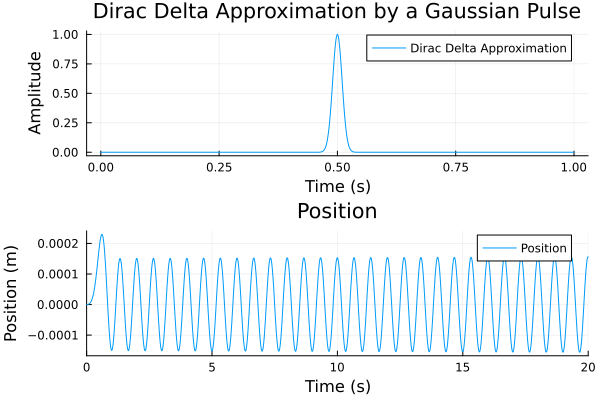

In [26]:
using DifferentialEquations
using Plots

# Parameters
m = 75.0                      # Mass (kg)
w0 = 2 * π * 1.5              # Resonant frequency (rad/s)
k = m * w0^2                  # Spring constant
gamma = 0.1                   # Damping coefficient
F0 = 1.0                      # Amplitude of the impulse
t0 = 0.5                      # Time of impact
sigma = 0.18                  # Width of Gaussian pulse
epsilon = 0.01                # Width of the Dirac delta approximation

# Define the Gaussian pulse which approximates a Dirac delta function
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

# Time interval for plotting the Dirac delta approximation
t = 0:0.001:1

# Calculate the Dirac delta approximation
dirac_approx = [gaussian_pulse(ti, t0, F0, epsilon) for ti in t]

# Plot the Dirac delta approximation
p0 = plot(t, dirac_approx, label="Dirac Delta Approximation", xlabel="Time (s)", ylabel="Amplitude", title="Dirac Delta Approximation by a Gaussian Pulse")

# Define the system of equations
function mass_spring_damper!(ddu, du, u, p, t)
    ddu[1] = (gaussian_pulse(t, t0, F0, sigma) - gamma * du[1] - k * u[1]) / m
end

# Initial conditions
u0 = [0.0]                    # Initial position
v0 = [0.0]                    # Initial velocity
tspan = (0.0, 20.0)           # Time span

# Problem definition
prob = SecondOrderODEProblem(mass_spring_damper!, v0, u0, tspan)

# Solve the problem 
sol = solve(prob)

# Plot the solution for position
p1 = plot(sol, idxs=2, label="Position", xlabel="Time (s)", ylabel="Position (m)", title="Position") # Here idxs = 2 is the position

# Combine the plots
plot(p0, p1, layout = (2, 1))


Now we will transform the second-order into a first-order system. 
We introduce a new variable $ v(t) $ to represent the velocity $ \dot{u}(t) $.

We then obtain the following first-order system:
$
\begin{cases}
\dot{u}(t) = v(t) \\
\dot{v}(t) = \frac{1}{m} (F_{\text{external}}(t) - \gamma v(t) - k u(t))
\end{cases}
$

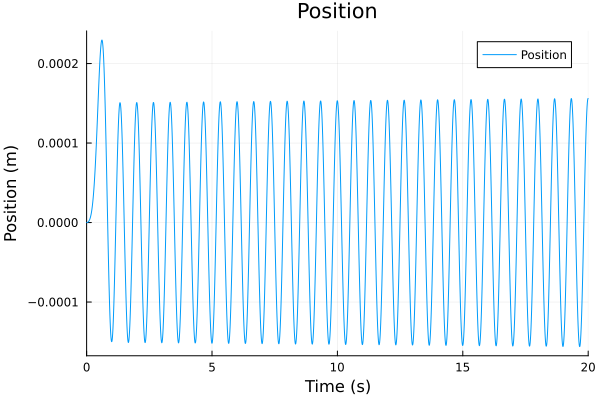

In [4]:
# Define the system of equations
function mass_spring_damper!(du, u, p, t)
    F_external = gaussian_pulse(t, t0, F0, sigma)
    du[1] = u[2]
    du[2] = (F_external - gamma * u[2] - k * u[1]) / m
end

# Initial conditions
u0 = [0.0, 0.0]              # Initial position and velocity

# Problem definition
prob_one_ODE = ODEProblem(mass_spring_damper!, u0, tspan)

# Solve the problem using the default solver (explicit method Tsit5)
sol_one_ODE = solve(prob_one_ODE, Tsit5())

# Plot the solution for position and velocity
p2 = plot(sol_one_ODE, idxs=1, label="Position", xlabel="Time (s)", ylabel="Position (m)", title="Position") # Here idxs = 1 is the position

# Display the plot
display(p2)


- **Implicit and Explicit Methods**

**Explicit Methods:**

Explicit methods calculate the future state of a system directly from the current state.

Example: `Tsit5` is a 5th order Runge-Kutta method for non-stiff ordinary differential equations (ODEs).

**Implicit Methods:**

Implicit methods may require solving a system of simultaneous equations at each time step.

Example : The `Rosenbrock23` method is a 2nd to 3rd order adaptive implicit method suitable for stiff ODEs. It is more stable and can handle stiffer problems effectively.

Given the nature of the system we are solving (a damped harmonic oscillator with relatively low damping), the results from explicit and implicit methods will be very close. This is because the system is not particularly stiff (with widely varying timescales), and both methods can accurately capture the dynamics of the system.

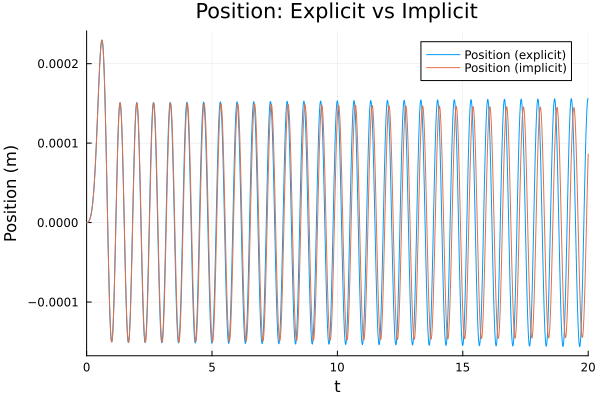

In [5]:
# Solve the problem using an explicit method (Tsit5)
sol_explicit = solve(prob, Tsit5())

# Solve the problem using an implicit method (Rosenbrock23)
sol_implicit = solve(prob, Rosenbrock23())

# Compare the explicit and implicit solutions for position
p3 = plot(sol_explicit, idxs=2, label="Position (explicit)", xlabel="Time (s)", ylabel="Position (m)", title="Position: Explicit vs Implicit")
plot!(p3, sol_implicit, idxs=2, label="Position (implicit)")

# Display both plots in one figure
display(p3)


2. ***Comparison with the Analytical Solution:***
- Compare the results of the numerical integration with the analytical solution to verify the accuracy and validity of the numerical model.

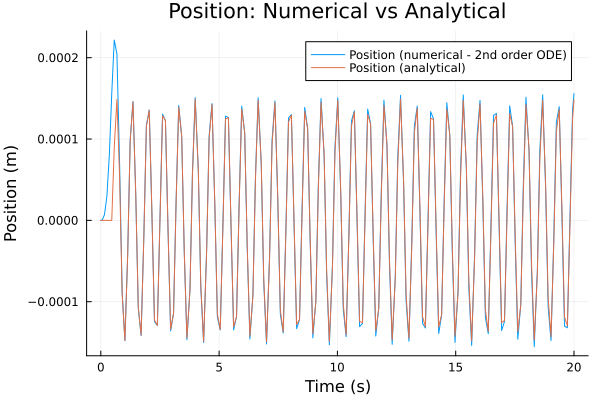

In [6]:
# Analytical solution for the damped case
function analytical_solution_damped(t, t0, F0, m, γ, ω0)
    α = γ / (2m)
    β = sqrt(4m*k - γ^2) / (2m)
    u = similar(t)
    for i in 1:length(t)
        if t[i] >= t0
            u[i] = (F0 / (m * β^2)) * exp(-α * (t[i] - t0)) * sin(β * (t[i] - t0))
        else
            u[i] = 0.0
        end
    end
    return u
end

# Calculate the analytical solutions
t = sol.t 
u_analytical_damped = analytical_solution_damped(t, t0, F0, m, gamma, w0)

# Plot the numerical and analytical solutions together for position
p4 = plot(t, sol[2,:], label="Position (numerical - 2nd order ODE)", xlabel="Time (s)", ylabel="Position (m)", title="Position: Numerical vs Analytical")
plot!(p4, t, u_analytical_damped, label="Position (analytical)")

# Display the plots
display(p4)


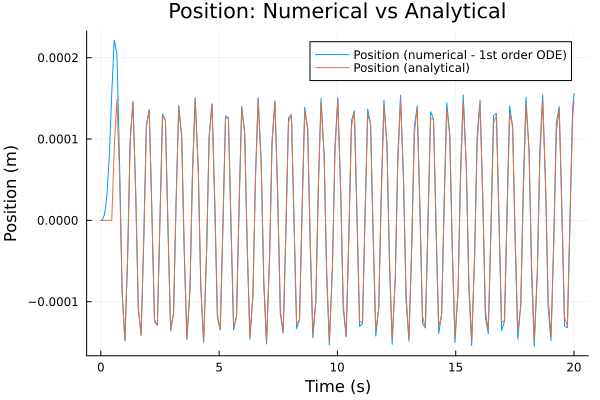

In [7]:
# Plot the numerical (1order ODE) and analytical solutions together for position
p5 = plot(t, sol_one_ODE[1,:], label="Position (numerical - 1st order ODE)", xlabel="Time (s)", ylabel="Position (m)", title="Position: Numerical vs Analytical")
plot!(p5, t, u_analytical_damped, label="Position (analytical)")

# Display the plots
display(p5)

- **Errors evolution display**

We calculated the absolute and relative errors between the numerical and analytical solutions and plotted their logarithms (base 10). This helps visualize the error magnitude and its evolution over time.

$ \text{Absolute Error} = |u_{\text{numerical}} - u_{\text{analytical}}| $

  - Direct deviation between numerical and analytical solutions.
  - Indicates overall precision at each time point.

The absolute error plot stabilizing bellow $-5$ (i.e., $10^{-5}$) on the logarithmic scale indicates that the numerical solution is highly accurate and remains stable over time, suggesting the chosen numerical method and simulation parameters are reliable for this problem.

$ \text{Relative Error} = \left| \frac{u_{\text{numerical}} - u_{\text{analytical}}}{u_{\text{analytical}}} \right| $

  - Precision of the numerical solution relative to the analytical solution's magnitude.
  - Useful when the analytical solution varies significantly in size.

The relative error stabilizes just below $-2$ on the logarithmic scale, indicating that the relative error is close to $0.01$. This suggests that the proportional accuracy of the numerical solution relative to the analytical solution remains constant. This could imply a discrepancy in the amplitude between the two solutions.

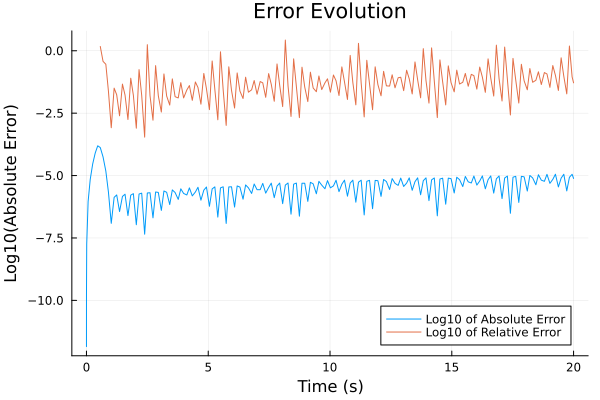

In [20]:
# Calculate the analytical solutions
t = sol.t
u_analytical_damped = analytical_solution_damped(t, t0, F0, m, gamma, w0)

# Ensure both arrays have the same length
min_length = min(length(sol[2,:]), length(u_analytical_damped))

# Truncate or pad the arrays to the same length
sol_truncated = sol[2,1:min_length]
u_analytical_truncated = u_analytical_damped[1:min_length]

# Calculate the errors
absolute_error = abs.(sol_truncated .- u_analytical_truncated)
relative_error = abs.((sol_truncated .- u_analytical_truncated) ./ u_analytical_truncated)

# Plot the errors
p55 = plot(t[1:min_length], log10.(absolute_error), label="Log10 of Absolute Error", xlabel="Time (s)", ylabel="Log10(Absolute Error)", title="Error Evolution")
plot!(p55, t[1:min_length], log10.(relative_error), label="Log10 of Relative Error")

# Display the plot
display(p55)


- **Absolute and Relative Tolerances**

In numerical integration, it is important to control the error of the solution.

**Absolute Tolerance (`abstol`):** Sets a limit on the absolute error of the solution.

**Relative Tolerance (`reltol`):** Sets a limit on the error relative to the magnitude of the solution.

These parameters define the precision of the solution, ensuring that the numerical error remains within acceptable bounds.

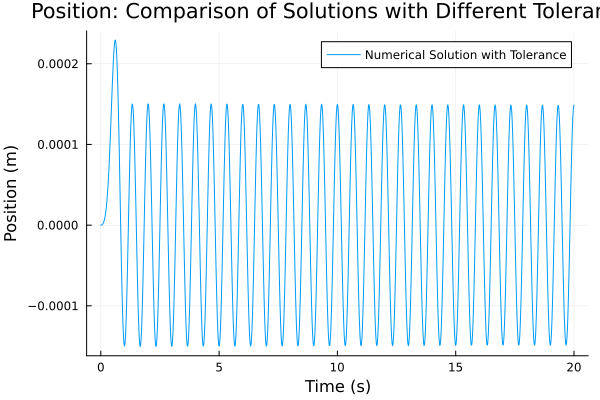

In [9]:
# Solve the problem using different tolerances
sol_tolerance = solve(prob, reltol=1e-12, abstol=1e-12)

# Calculate the analytical solution
t = sol_tolerance.t             
u_analytical_damped = analytical_solution_damped(t, t0, F0, m, gamma, w0)

# Plot the numerical solution with tolerance
p6 = plot(t, sol_tolerance[2,:], label="Numerical Solution with Tolerance", xlabel="Time (s)", ylabel="Position (m)", title="Position: Comparison of Solutions with Different Tolerances")
plot!(p5, t, u_analytical_damped, label="Analytical Solution")

# Display the plot
display(p6)


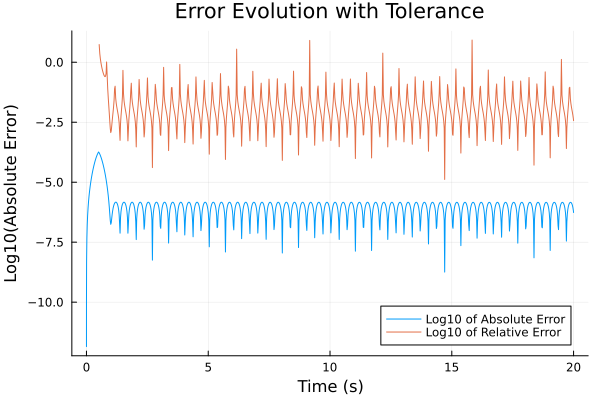

In [10]:
# Calculate the errors
absolute_error = abs.(sol_tolerance[2,:] .- u_analytical_damped)
relative_error = abs.((sol_tolerance[2,:] .- u_analytical_damped) ./ u_analytical_damped)

# Plot the errors
p66 = plot(t, log10.(absolute_error), label="Log10 of Absolute Error", xlabel="Time (s)", ylabel="Log10(Absolute Error)", title="Error Evolution with Tolerance")
plot!(p66, t, log10.(relative_error), label="Log10 of Relative Error")

# Display the plot
display(p66)

3. **Analyze Frequency Orbit:**
    - Use Fast Fourier Transform (FFT) to analyze the frequency components of the system's response. FFT decomposes the time-domain signal into its frequency components, which is useful for identifying resonance frequencies and other dynamic characteristics of the system.

We used Fast Fourier Transform (FFT) analysis on the Gaussian pulse and found that it contains frequency components aligning with the system's resonant frequency, evidenced by a peak amplitude at 1.5 Hz and significant energy at lower frequencies.

In [11]:
# Given resonant frequency in rad/s
ω0 = 2 * π * 1.5  # Resonant frequency (rad/s)

# Calculate the resonant frequency in Hz
f0 = ω0 / (2 * π)

println("La fréquence de résonance du système est $f0 Hz")

La fréquence de résonance du système est 1.5 Hz


The system's resonance frequency is 1.4992503748125936 Hz


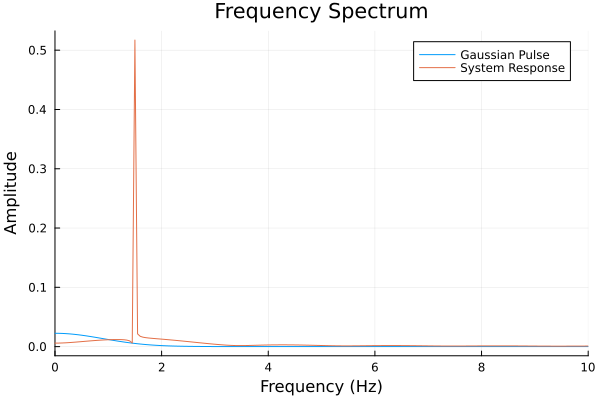

In [27]:
using FFTW, Plots

# Adjust the time resolution for better FFT accuracy
t = 0:0.01:20.0  # Time interval for better resolution

# Redefine the Gaussian pulse signal with the new time resolution
gaussian_signal = [gaussian_pulse(ti, t0, F0, sigma) for ti in t]

# Calculate the FFT of the Gaussian pulse signal
fft_result_gaussian = fft(gaussian_signal)

# Calculate the frequencies corresponding to the FFT coefficients
N = length(t)
T = t[2] - t[1]
Fs = 1 / T
freqs = [i * Fs / N for i in 0:N-1]

# Filter to keep only positive frequencies up to 10 Hz
positive_indices = findall(x -> x <= 10 && x <= Fs/2, freqs)
positive_freqs = freqs[positive_indices]
positive_fft_result_gaussian = abs.(fft_result_gaussian[positive_indices]) / N

# Calculate the FFT of the system response
u_analytical = analytical_solution_damped(t, t0, F0, m, gamma, w0, w0)
fft_result = fft(u_analytical)
positive_fft_result = abs.(fft_result[positive_indices]) / N

# Plot the FFT of the Gaussian pulse and the system response on the same graph
p9 = plot(positive_freqs, positive_fft_result_gaussian, label="Gaussian Pulse", xlabel="Frequency (Hz)", ylabel="Amplitude", title="Frequency Spectrum", xlim=(0, 10))
plot!(p9, positive_freqs, positive_fft_result, label="System Response")

# Identify the resonance peak
resonance_index = argmax(positive_fft_result)
resonance_frequency = positive_freqs[resonance_index]
println("The system's resonance frequency is $resonance_frequency Hz")

# Display the graph
display(p9)


### 3.5/ Vibration study : Superposition of Two Harmonic Oscillations

#### Analytical solution

We have already found the solutions for the oscillations at the system's eigenfrequency and the driving frequency. Now, let's move on to analyzing the frequency response and understanding the behavior of the system in the long term (steady state).

We need to study how the system responds to different driving frequencies ($\omega_d$) in comparison to the eigenfrequency ($\omega_0$). We consider three cases:

**Case 1: $\omega_d < \omega_0$​**

When the driving frequency is lower than the eigenfrequency, the system oscillates at the driving frequency.
The amplitude of the oscillation will depend on the difference between the driving and eigenfrequencies and the damping coefficient γ.

**Case 2: $\omega_d = \omega_0$​**

This is the resonance condition. When the driving frequency matches the eigenfrequency, the system experiences resonance.
The amplitude of oscillation reaches its maximum. In the absence of damping (γ=0γ=0), the amplitude would theoretically go to infinity. However, with damping present, the amplitude is limited but still significantly larger than in other cases.

**Case 3: $\omega_d > \omega_0$​**

When the driving frequency is higher than the eigenfrequency, the system still oscillates at the driving frequency.
The amplitude of oscillation decreases as the driving frequency moves further away from the eigenfrequency.

#### Harmonic Solution and Steady State

Damped Oscillation: For $\gamma \neq 0$, the oscillations due to the initial conditions (homogeneous solution) decay exponentially over time due to the damping. This means that the influence of the system's natural frequency ($\omega_0$​) diminishes.

Steady State: After a long time, only the forced oscillations at the driving frequency ($\omega_d$​) remain significant. This is because the transient response (the part of the solution due to initial conditions) dies out, leaving the steady-state response due to the continuous driving force.

#### Numerical study

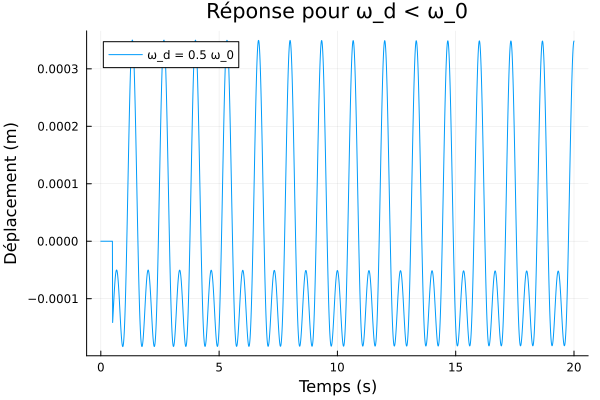

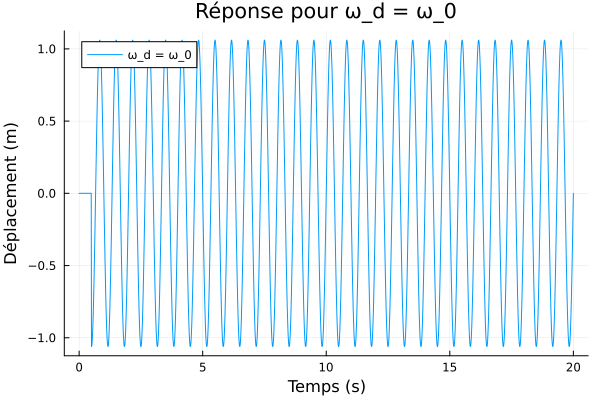

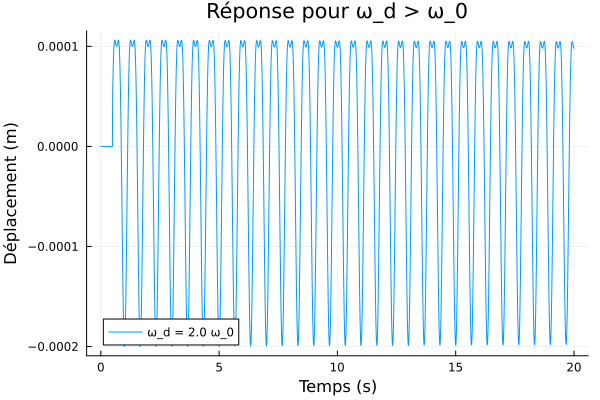

In [14]:
# Analytical solution for the damped case with wd
function analytical_solution_damped(t, t0, F0, m, γ, ω0, ωd)
    α = γ / (2m)
    β = sqrt(ω0^2 - α^2)
    A = F0 * (k - m * ωd^2) / ((k - m * ωd^2)^2 + (γ * ωd)^2)
    B = F0 * γ * ωd / ((k - m * ωd^2)^2 + (γ * ωd)^2)
    
    u = similar(t)
    for i in 1:length(t)
        if t[i] >= t0
            # Solution homogène + Solution particulière
            u[i] = (F0 / (m * β^2)) * exp(-α * (t[i] - t0)) * sin(β * (t[i] - t0)) + A * cos(ωd * t[i]) + B * sin(ωd * t[i])
        else
            u[i] = 0.0
        end
    end
    return u
end

# Temps pour la solution
t = 0:0.01:20.0

# Exemples de fréquences d'excitation
ω_ds = [0.5 * w0, w0, 2.0 * w0]
solutions = []

for wd in ω_ds
    u = analytical_solution_damped(t, t0, F0, m, gamma, w0, wd)
    push!(solutions, u)
end

# Tracer les résultats pour différents cas de fréquences d'excitation
p10 = plot(t, solutions[1], label="ω_d = 0.5 ω_0", xlabel="Temps (s)", ylabel="Déplacement (m)", title="Réponse pour ω_d < ω_0")
p11 = plot(t, solutions[2], label="ω_d = ω_0", xlabel="Temps (s)", ylabel="Déplacement (m)", title="Réponse pour ω_d = ω_0")
p12 = plot(t, solutions[3], label="ω_d = 2.0 ω_0", xlabel="Temps (s)", ylabel="Déplacement (m)", title="Réponse pour ω_d > ω_0")

# Afficher les graphiques
display(p10)
display(p11)
display(p12)

**Case 1: $\omega_d < \omega_0$**

For $\omega_d = 0.5 \cdot \omega_0$, the frequency spectrum shows two peaks:

A first peak at 0.5 Hz with an amplitude of 0.2 \
A second peak at 1.5 Hz with an amplitude of 0.15

This indicates that the system oscillates primarily at the driving frequency of 0.5 Hz, but also exhibits resonance at its natural frequency of 1.5 Hz. The presence of both peaks shows the superposition of the forced oscillation at the driving frequency and the system's natural resonance.

**Case 2: $\omega_d = \omega_0$**

For $\omega_d = \omega_0$, the frequency spectrum shows a single prominent peak:

A peak at 1.5 Hz with an amplitude of 1000 

This is the resonance condition. When the driving frequency matches the system's natural frequency, we observe a resonance phenomenon where the amplitude of the oscillations reaches its maximum. The large amplitude observed (1000) is due to this resonance, meaning the system absorbs a lot of energy at this frequency.

**Case 3: $\omega_d > \omega_0$**

For $\omega_d = 2 \cdot \omega_0$, the frequency spectrum shows two peaks:

A first peak at 1.5 Hz with an amplitude of 0.15 \
A second peak at 3 Hz with an amplitude of 0.05

In this case, the system primarily oscillates at the driving frequency of 3 Hz. However, the natural frequency of 1.5 Hz also appears, indicating some residual resonance at the system's natural frequency.

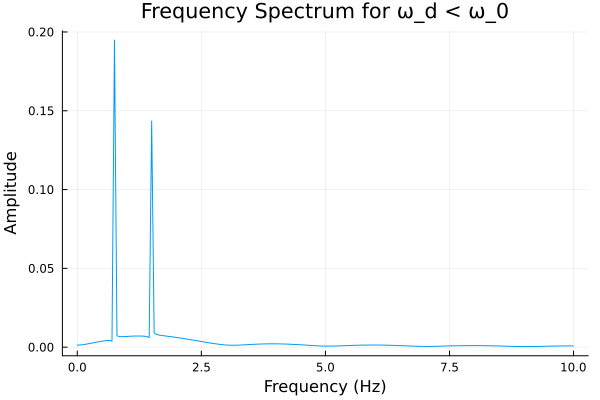

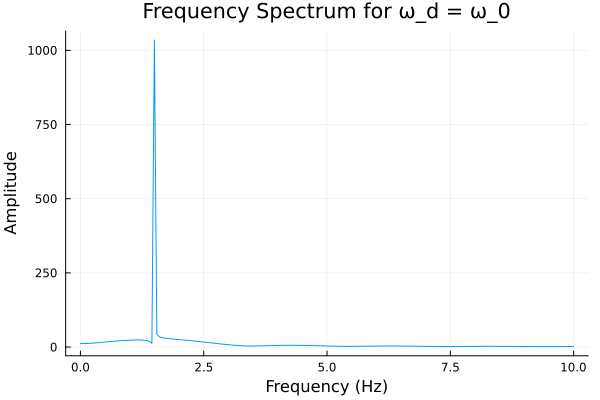

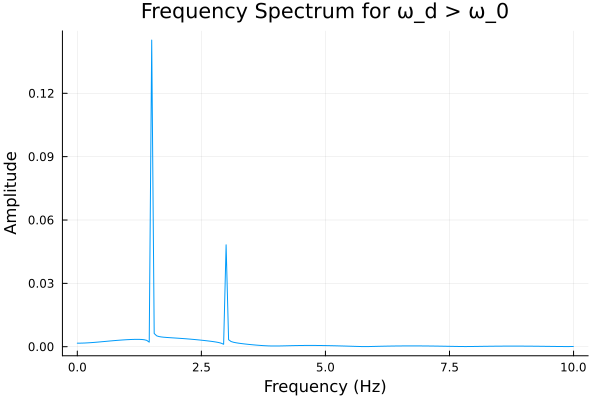

In [76]:
using FFTW, Plots

# Function to calculate and plot the frequency spectrum
function plot_frequency_spectrum(solution, t, title)
    N = length(t)
    T = t[2] - t[1]
    Fs = 1 / T

    # Calculate the FFT of the solution
    fft_result = fft(solution)
    
    # Calculate the frequencies corresponding to the FFT coefficients
    freqs = [i * Fs / N for i in 0:N-1]
    
    # Filter to keep only positive frequencies up to 10 Hz
    positive_indices = findall(x -> x <= 10 && x <= Fs/2, freqs)
    positive_freqs = freqs[positive_indices]
    positive_fft_result = abs.(fft_result[positive_indices])
    
    # Plot the frequency spectrum
    p = plot(positive_freqs, positive_fft_result, xlabel="Frequency (Hz)", ylabel="Amplitude", title=title, label="")
    return p
end

# Plot the frequency spectra for each case
p20 = plot_frequency_spectrum(solutions[1], t, "Frequency Spectrum for ω_d < ω_0")
p21 = plot_frequency_spectrum(solutions[2], t, "Frequency Spectrum for ω_d = ω_0")
p22 = plot_frequency_spectrum(solutions[3], t, "Frequency Spectrum for ω_d > ω_0")

# Display the frequency spectrum plots
display(p20)
display(p21)
display(p22)


## 4/ Two Point Mass System 

### 4.1/ Case-study/Description/Motion: 

Consider a model with two interconnected point masses (2-DOF along x-axis). This can represent various scenarios such as a bus and door, two doors, a door separated into two parts, or a door separated into a glass and metal frame. The motion of the system can be described using the displacement of each mass along the x-axis.

### 4.2/ Mathematical Model 

#### ODE for Two Mass-Spring-Damper System

Consider a system of two coupled point masses with the following equations of motion:

$
\begin{cases}
m_1 \ddot{u}_1(t) + \gamma_1 \dot{u}1(t) + k_1 (u_1(t) - u_2(t)) = F{external1}(t) \\
m_2 \ddot{u}_2(t) + \gamma_2 \dot{u}2(t) + k_2 (u_2(t) - u_1(t)) = F{external2}(t)
\end{cases}
$

where:

$ m_1 $ and $ m_2 $ are the masses

$ \gamma_1 $ and $ \gamma_2 $ are the damping coefficients

$ k_1 $ and $ k_2 $ are the spring constants

$ u_1(t) $ and $ u_2(t) $ are the displacements of the masses as functions of time

$ \dot{u}_1(t) $ and $ \dot{u}_2(t) $ are the velocities

$ \ddot{u}_1(t) $ and $ \ddot{u}_2(t) $ are the accelerations

$ F_{external1}(t) $ and $ F_{external2}(t) $ are the external forces applied to the masses

#### Initial Conditions

The system starts from rest, so the initial conditions are:

$
u_1(0) = 0 \quad \text{(zero initial position of mass 1)}
$

$
\dot{u}_1(0) = 0 \quad \text{(zero initial velocity of mass 1)}
$

$
u_2(0) = 0 \quad \text{(zero initial position of mass 2)}
$

$
\dot{u}_2(0) = 0 \quad \text{(zero initial velocity of mass 2)}
$

### 4.3/ Parameter values

1. **Masses $m_1$ and $m_2$:**  
Between 50 and 100 kg for each mass.

2. **Spring Constants $k_1$ and $k_2$:** 
Such that $\sqrt{\frac{k_1}{m_1}}$ and $\sqrt{\frac{k_2}{m_2}}$ match the measured resonant frequencies $\omega_{01}$ and $\omega_{02}$, meaning that:
$ k_1 = m_1 \omega_{01}^2 $ and $ k_2 = m_2 \omega_{02}^2 $ (simple harmonic motion)

3. **Damping Coefficients $\gamma_1$ and $\gamma_2$:**
Hard to estimate directly. Resort to experimental measurements or tuning based on observations.

### 4.3/ Impact study 

Impose impact on one of two point masses. Solve analytically using Laplace transform (find linear system for U_1(s) and U_2(s), solve linear system, perform backtransform to obtain u_1(t) and u_2(t)). Solve analytically using matrix diagonalization. Two resonant frequencies. Two vibrational eigenmodes (see comsol.com webpage). Solve numerically using time integration. Compare analytical and numerical solution. 
 
### 4.4/ Vibration study 


Impose forced vibration with driving frequency \omega_d on one of two point masses. Proceed as before.  Investigate frequency response, in particular \omega_d close to one of both resonant frequencies. 



References: 

https://github.com/ziolai/ventura-modeling/blob/main/jupyter-notebooks/point-mass-systems.ipynb 



## 5/ Stationary Thin Beam Equation - Biharmonic Equation - Deflection 


gti hub Dr. Lahaye : https://github.com/ziolai/finite_element_electrical_engineering/tree/main 

Find analytical reference solution on wiki pages. Recover analytical reference using shooting method implemented in  DifferentialEquations.jl (see internship Yann Oukrid). 



Solve bi-harmonic equation using finite difference method on uniform spatial mesh. 



(In case that Anouchka finds this interesting and fun). Solve bi-harmonic equation using finite element method on non-uniform spatial mesh. 



References: 

implementation in part available; 



## 6/ Thin Beam Equation Modal Analysis 



Find analytical expressions for the eigenmodes. Recover analytical expression by computing eigenvalues and eigenmodes of the discrete bi-harmonic equation. 



The eigenvectors of the matrix A are numerical approximation to the shape modes or modal modes of the structure. These modes are explained on the wiki page https://en.wikipedia.org/wiki/Modal_analysis_using_FEM . This webpage says that "The physical interpretation of the eigenvalues and eigenvectors which come from solving the system are that they represent the frequencies and corresponding mode shapes. Sometimes, the only desired modes are the lowest frequencies because they can be the most prominent modes at which the object will vibrate, dominating all the higher frequency modes.”



## 7/ Thin Beam Equation Transient Analysis 



Find analytical reference solution (using e.g,. separation of variables) in literature. 



Recover analytical reference solution using finite difference in space and time-integration iin time domain. 



(In case that Anouchka finds this interesting and fun): replace uniform mesh finite differences in space by non-uniform mesh finite elements in space. 



References: 

\url{https://en.wikipedia.org/wiki/Euler\%E2\%80\%93Bernoulli_beam_theory}



## 8/ Thin Beam Equation Transient Analysis with Hinges as Boundary conditions 



Find reference solutions (see e.g. papers by Demeio - Lenci - 2019) (need to give Anouchka access to paper). 



Reproduce reference results numerically using either finite differences on uniform mesh first and possibly using finite elements on non-uniform mesh later. 



## 9/ Extend to Two Dimensional Kirchoff - Love Thin Plate Equations 

[In case time, enthousiasm and excitement remains] 

References

\url{https://en.wikipedia.org/wiki/Kirchhoff\%E2\%80\%93Love\_plate\_theory}



## 10/ Conclusions 



What we learned in the project. 
